In [1]:
from elasticsearch import Elasticsearch
from elasticsearch import helpers
from elasticsearch.helpers import scan
import pandas as pd
import numpy as np
import requests, json
import matplotlib.pyplot as plt 

## Nacitanie json

In [2]:
data = []
with open('person.json', encoding='utf-8') as f:
    for line in f:
        if "-00" not in line:
            data.append(json.loads(line[:-2]))

In [3]:
json_dataframe = pd.DataFrame(data)

In [4]:
json_dataframe['name'] = json_dataframe['name'].str.replace('@en', '')
json_dataframe.drop(json_dataframe.columns[[6]], axis=1, inplace=True)

In [5]:
len(json_dataframe)

1259847

## Indexovanie

In [6]:
es = Elasticsearch([{'host': 'localhost', 'port': 9200}], timeout=30, max_retries=10, retry_on_timeout=True)

In [7]:
#helpers.bulk(es, data, index='person')
#es.indices.delete(index='person')
#es.delete_by_query(index='person', body={"query": {"match_all": {}}})

## Profesia

In [8]:
json_profession_dataframe = json_dataframe.explode('profession')

In [9]:
most_profession = json_profession_dataframe['profession'].value_counts()[:4].index.tolist()

sum_profession = []
sum_profession.append(json_dataframe.profession.str.count(most_profession[0]).sum())
sum_profession.append(json_dataframe.profession.str.count(most_profession[1]).sum())
sum_profession.append(json_dataframe.profession.str.count(most_profession[2]).sum())
sum_profession.append(json_dataframe.profession.str.count(most_profession[3]).sum())

sum_profession.sort(reverse=True)

In [10]:
print("1. najcastejsia profesia - ", most_profession[0], round(100 * sum_profession[0]/len(json_dataframe), 2),"%")
print("2. najcastejsia profesia - ", most_profession[1], round(100 * sum_profession[1]/len(json_dataframe), 2),"%")
print("3. najcastejsia profesia - ", most_profession[2], round(100 * sum_profession[2]/len(json_dataframe), 2),"%")
print("4. najcastejsia profesia - ", most_profession[3], round(100 * sum_profession[3]/len(json_dataframe), 2),"%")

1. najcastejsia profesia -  None 54.99 %
2. najcastejsia profesia -  Actor 7.45 %
3. najcastejsia profesia -  Writer 2.54 %
4. najcastejsia profesia -  Politician 1.15 %


## Pohlavie

In [11]:
most_gender_labels = json_dataframe['gender'].unique()
most_gender_number = json_dataframe['gender'].value_counts()

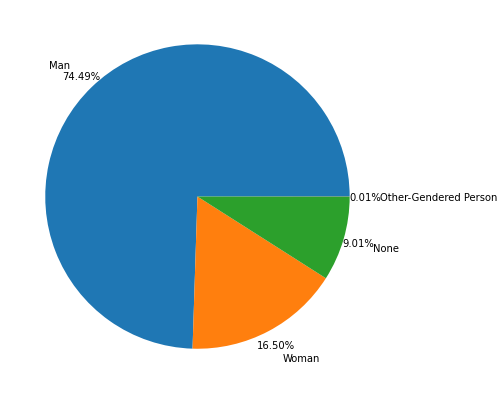

In [12]:
labels = most_gender_labels
number = [most_gender_number]
fig = plt.figure(figsize =(10, 7)) 
plt.pie(np.array(number).ravel(), labels = labels, autopct='%1.2f%%', pctdistance=1.1, labeldistance=1.2) 
  
plt.show() 

## Aliasy

In [13]:
json_alias_dataframe = json_dataframe.explode('alias')

In [14]:
most_alias = json_alias_dataframe['name'].value_counts()[:4].index.tolist()

In [15]:
most_aliases = json_dataframe[json_dataframe['name'].str.contains(most_alias[0], na=False)]

In [16]:
most_aliases['alias'].iloc[0]

['Joan Almirall@it',
 'Rick Deconinck@it',
 'Jess@en',
 'Frarik Hollmann@en',
 'Dan L. Simon@it',
 'Tío Jess@en',
 'Robert Zinnermann@es-419',
 'Jeff Frank@it',
 'Dennis Farnon@es-419',
 'Jess Frank@it',
 'James P. Johnson@en',
 'Rosa M. Almirall@en',
 'Terry De Corsia@en',
 'Preston Quaid@es-419',
 'Betty Carter@es-419',
 'Lulu Laverne@it',
 'Manfred Gregor@en',
 'J.F. Manner@en',
 'J. Franco@it',
 'Frank Hollman@es-419',
 'Rosa Mª Almirall@it',
 'Dave Tough@it',
 'A.L. Marioux@en',
 'Clifford Brown Jr.@it',
 'Jesus Manera@en',
 'Lowel Richmond@es-419',
 'Preston Quaid@en',
 'Pablo Villa@it',
 'David Khune@es-419',
 'David Kühne@es-419',
 'Jack Griffin@it',
 'A.L. Malraux@en',
 'Rosa Mª Almirall@es-419',
 'Jeff Manner@en',
 'Clifford Brown Jr.@es-419',
 'Jess Franck@it',
 'B.F. Johnson@es-419',
 'Adolf M. Frank@it',
 'Rosa Almirall@es-419',
 'D. Khunne@it',
 'Frank Hollmann@es-419',
 'B.F. Johnson@it',
 'David Khunne II@es-419',
 'Raymond Dubois@en',
 'Clifford Brown@en',
 'P. Querut@

## Datumy

In [17]:
date_21 = es.search(index='person', scroll="5m", body=
    { 
        "query": {
             "range": {
                 "date_of_birth": {
                     "gte": "2001-01-01"
                 }
             }
        }
    })
date_20 = es.search(index='person', scroll="5m", body=
    { 
        "query": {
             "range": {
                 "date_of_birth": {
                     "gte": "1901-01-01","lte": "2000-12-31"
                 }
             }
        }
    })
date_19 = es.search(index='person', scroll="5m", body=
    { 
        "query": {
             "range": {
                 "date_of_birth": {
                     "gte": "1801-01-01","lte": "1900-12-31"
                 }
             }
        }
    })
date_18 = es.search(index='person', scroll="5m", body=
    { 
        "query": {
             "range": {
                 "date_of_birth": {
                     "gte": "1701-01-01","lte": "1800-12-31"
                 }
             }
        }
    })
date_17 = es.search(index='person', scroll="5m", body=
    { 
        "query": {
             "range": {
                 "date_of_birth": {
                     "lt": "1701-01-01"
                 }
             }
        }
    })
date_none = json_dataframe[json_dataframe['date_of_birth'].isnull()]

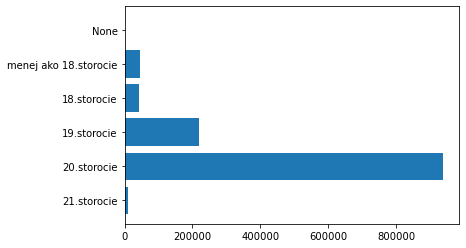

[10871, 939671, 220768, 43507, 45028, 2]


In [18]:
labels = ['21.storocie', '20.storocie', '19.storocie', '18.storocie', 'menej ako 18.storocie', 'None']
number = [date_21['hits']['total']['value'], date_20['hits']['total']['value'], date_19['hits']['total']['value'], date_18['hits']['total']['value'], date_17['hits']['total']['value'], len(date_none)]

plt.barh(np.arange(len(labels)), number)
plt.yticks(np.arange(len(labels)), labels)
plt.show()

print(number)

## Vyhladavanie podla mena

In [19]:
#found_name = es.search(index='person', scroll="5m", body={ "query": {"match": {"name": "Peter"}}})
found_name = helpers.scan(es,  query={"query": {"match": {
    'name':'sergio'
    }}}, index="person")

In [20]:
for i in found_name:
    print(i['_source']['name'])
    print("alias: ", i['_source']['alias'])
    print()

Sergio Tréfaut@en
alias:  ['Sergio Trefaut@en', 'Serge Tréfaut@en', 'Sérgio Tréfaut@en']

Sergio Berger@en
alias:  None

Sergio Blardony@en
alias:  None

Sergio Giordani@en
alias:  None

Sergio Renda@en
alias:  None

Sergio González Morales@en
alias:  Sergio "Tilo" González@en

Sergio Rodríguez@en
alias:  Sergio Rodríguez Muñoz@en

Sergio Andrade@en
alias:  None

Sergio Embrioni@en
alias:  Embrioni, Sergio@en

Sergio Nuti@en
alias:  None

Sergio Zavattieri@en
alias:  None

Sergio Pagnacco@en
alias:  None

Sergio Ramos@en
alias:  None

Sergio Sinceri@en
alias:  None

Sergio Loo@en
alias:  None

Sergio Spagnolo@en
alias:  None

Sergio Munoz@en
alias:  None

Sergio Aschero@en
alias:  None

Sergio Assisi@en
alias:  None

Sergio Schulmeister@en
alias:  None

Sergio Molina Rivero@en
alias:  None

Sergio Quiñones@en
alias:  None

Sergio Henrique Francisco@en
alias:  Serginho@en

Sergio Lenci@en
alias:  None

Sergio Rochet@en
alias:  None

Sergio D'Elia@en
alias:  None

Sergio González Rodrígu

Sergio D'Offizi@en
alias:  ['Frederick Hail@en', 'Frederick Hail@it']

Sergio Rodríguez Viera@en
alias:  None

Sergio Montanari@en
alias:  ['Sergius Hillman@it', 'Sérgio Montanari@en', 'Sergius Hillman@ro', 'Sergio Montanaro@it', 'Sergius Hillman@es-419', 'Sergius Hillman@en']

Sergio Spina@en
alias:  None

Sergio Garrone@en
alias:  ['Willy R. Regan@it', 'S. Garrone@en', 'S. Garrone@it', 'Willy Regan@it', 'Willy Regan@en', 'Willy S. Regan@en', 'Willy S. Regan@it', 'Kenneth Freeman@en', 'Kenneth Freeman@it', 'Willy R. Regan@en']

Sergio Corrieri@en
alias:  ['Sergio Lucio Corrieri Hernández@en', 'Sergio Lucio Corrieri Hernández@fr', 'Sergio Lucio Corrieri Hernánde@nl']

Sergio Goretti@en
alias:  None

Sergio de Castro@en
alias:  None

Sergio@en
alias:  Sergo@en

Sergio Altieri@en
alias:  None

Sergio Rolandi@en
alias:  None

Sergio Pierattini@en
alias:  Sergio Fierattini@en

Sergio Vastano@en
alias:  None

Sergio Arcuri@en
alias:  None

Sergio Sasaki@en
alias:  Sergio Sasaki Junior@en

S